# <center>Network Science</center>

## <center>Home Assignment #2: Network models</center>

### <center>Student: *Khayrullin Rustem*</center>

#### <hr /> General Information

**Due Date:** 03.03.2017<br \>
**Late submission policy:** -2 points per day <br \>


Please send your reports to <network.hse.2016@gmail.com> with message subject of the following structure:<br \> **[HSE Networks 2017] *{LastName}* *{First Name}* HA*{Number}***

Support your computations with figures and comments. <br \>
If you are using IPython Notebook you may use this file as a starting point of your report.<br \>
<br \>
<hr \>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import numpy.random as rnd
%matplotlib inline

## Problems

### Task 1

Consider Barabasi and Albert dynamical grow model. Two main ingredients of this model are *network growing* and *prefferential attachment*. Implement two restricted B&A-based models:
<br \>

**Model A**
<br \>
Lack of prefferential attachment, that is at each time-step form edges uniformly at random while network keeps growing.

**Model B**
<br \>
Lack of growing, that is fix total number of nodes, on each time-step randomly choose one and form edges with prefferential attachment.
<br \>

1. Generate networks according to the models above ($N > 1000$ nodes)
2. Compute CDF/PDF, describe the distribution and compute\describe its properties.
3. Illustate the following dependencies: 
    * average path length to the number of nodes
    * average clustering coefficient to the number of nodes
    * average node degee to the nodes "age"
4. Is scale-free property conserved in these models?

Analyse results with respect to various parameter settings

<hr />
At first let's implement Model A and do all exercises with this.

In [2]:
import random
def gen_start_graph(n): # generate simple graph without edges
    G = nx.Graph()
    nodes = list(range(n))
    G.add_nodes_from(nodes)
    return G

def growth_without_pa(G,k): # k < n
    n = nx.number_of_nodes(G)
    if (n < k):
        print(n,k)
    G.add_node(n)
    s = random.sample(range(0,n), k)
    for node_to in s:
        G.add_edge(n,node_to)
    return G

This is implementation of generation our graph. So, we have two variables to build graph (N - number of nodes, k - average degree). Now we must analyse results with different values of k and N. We assume that N is big ( > 1000). Let's change k value and look what's happened if N growths on this cases: 
1. $ k = 1, N = 1000,2500,5000 $
2. $ k = 10, N = 1000,2500,5000 $
3. $ k = 20, N = 1000,2500,5000 $
    

-----------k =  1  N =  1000 -----------------------------------------------------------------
Max degree:  11
Kolmogorov-Smirnov test:  KstestResult(statistic=1.0, pvalue=0.0)


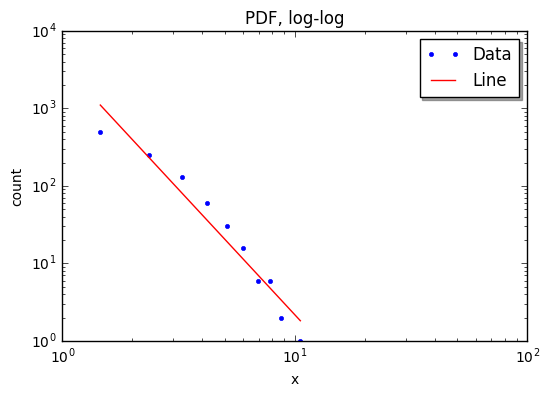

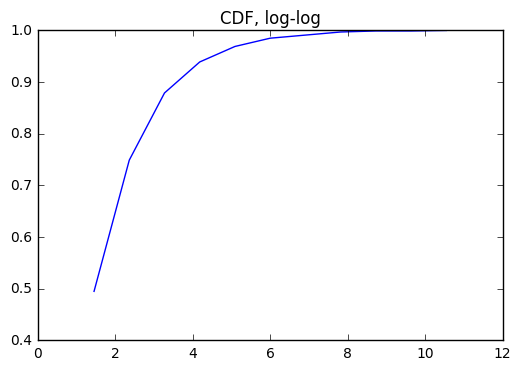

-----------k =  1  N =  2500 -----------------------------------------------------------------
Max degree:  12
Kolmogorov-Smirnov test:  KstestResult(statistic=1.0, pvalue=0.0)


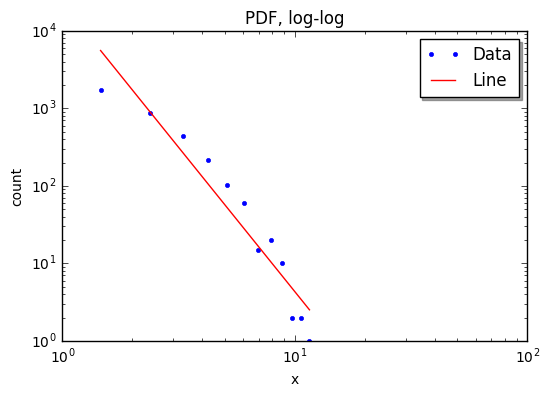

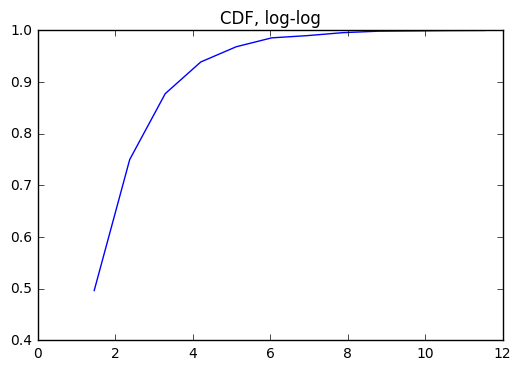

-----------k =  1  N =  5000 -----------------------------------------------------------------
Max degree:  14
Kolmogorov-Smirnov test:  KstestResult(statistic=1.0, pvalue=0.0)


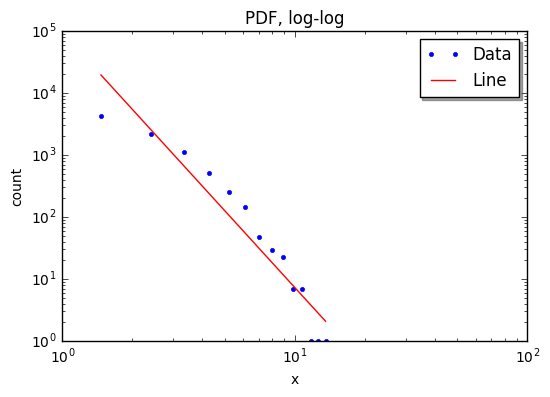

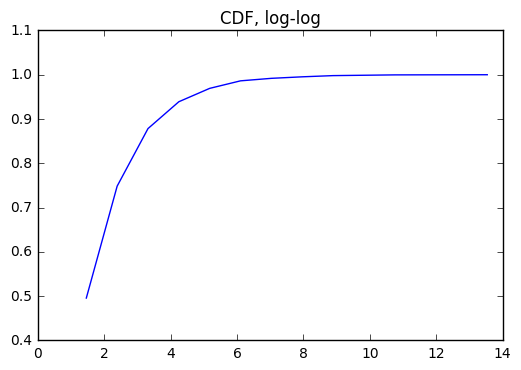

-----------k =  10  N =  1000 -----------------------------------------------------------------
Max degree:  61
Kolmogorov-Smirnov test:  KstestResult(statistic=1.0, pvalue=0.0)


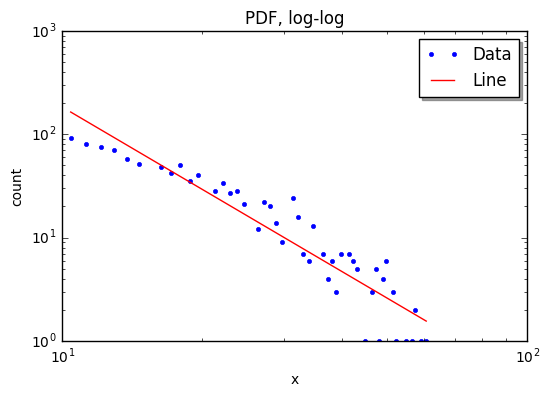

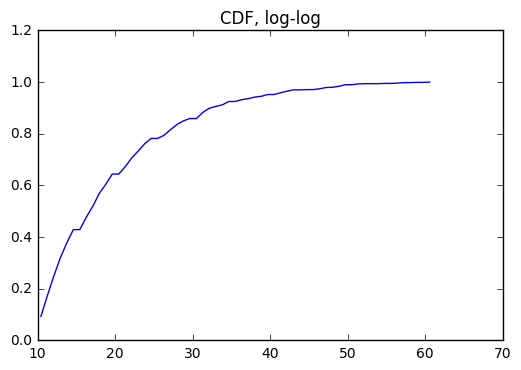

-----------k =  10  N =  2500 -----------------------------------------------------------------
Max degree:  76
Kolmogorov-Smirnov test:  KstestResult(statistic=1.0, pvalue=0.0)


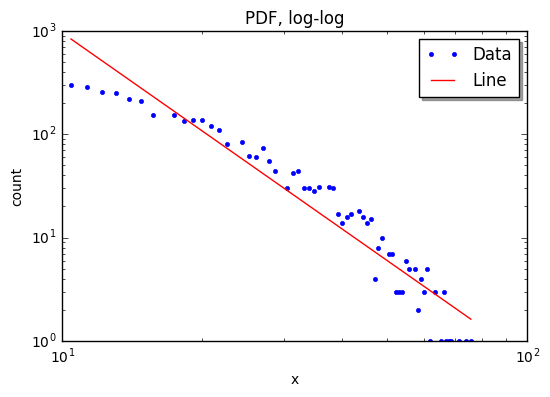

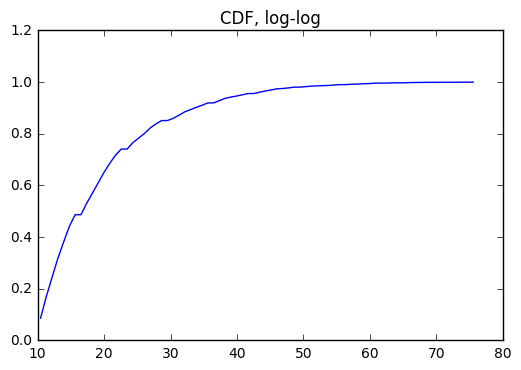

-----------k =  10  N =  5000 -----------------------------------------------------------------
Max degree:  83
Kolmogorov-Smirnov test:  KstestResult(statistic=1.0, pvalue=0.0)


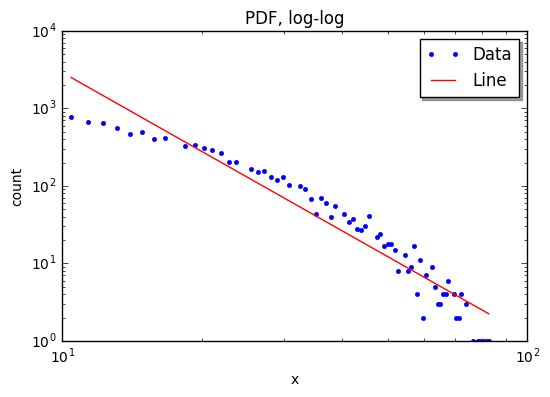

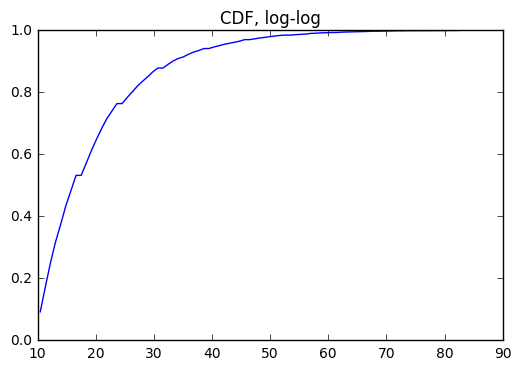

-----------k =  20  N =  1000 -----------------------------------------------------------------
Max degree:  108
Kolmogorov-Smirnov test:  KstestResult(statistic=1.0, pvalue=0.0)


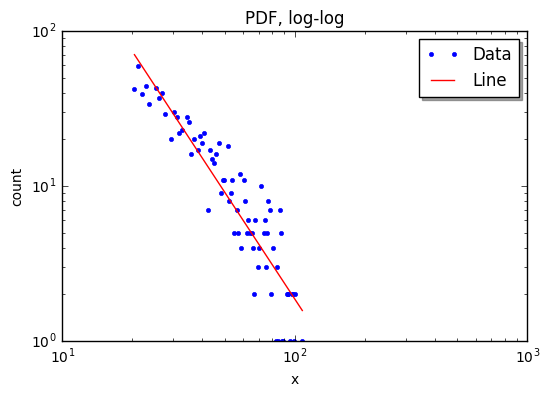

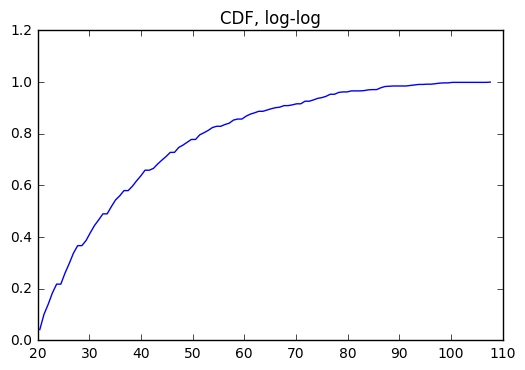

-----------k =  20  N =  2500 -----------------------------------------------------------------
Max degree:  131
Kolmogorov-Smirnov test:  KstestResult(statistic=1.0, pvalue=0.0)


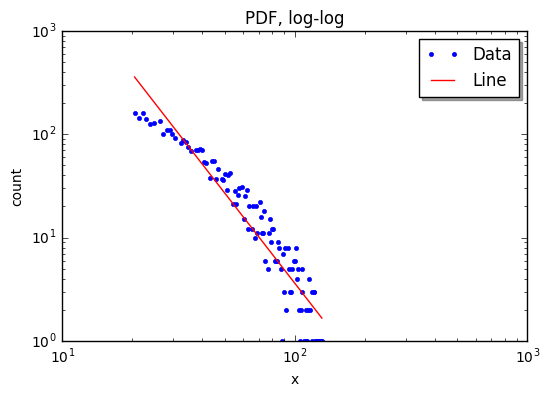

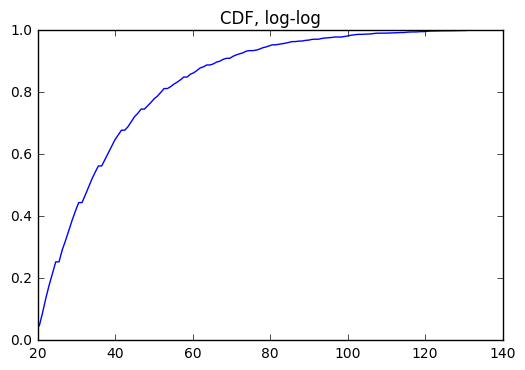

-----------k =  20  N =  5000 -----------------------------------------------------------------
Max degree:  154
Kolmogorov-Smirnov test:  KstestResult(statistic=1.0, pvalue=0.0)


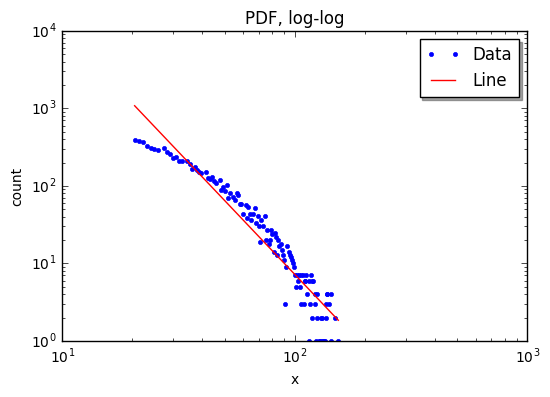

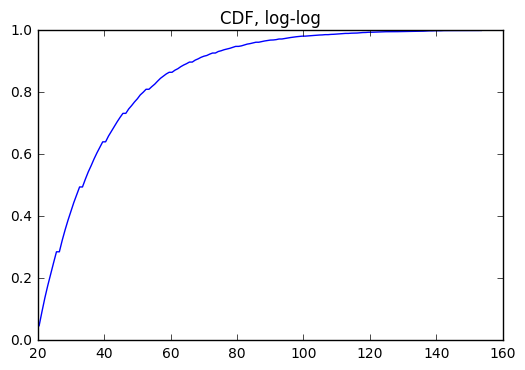

In [3]:
from scipy import stats
import math
N = [1000,2500,5000]
for k in (1,10,20):
        G = gen_start_graph(k)
        i = k
        for j in range(0,3):
            while i<N[j]:
                G = growth_without_pa(G,k)
                i+=1
            print '-----------k = ',k,' N = ',N[j],'-----------------------------------------------------------------'

            degrees = G.degree()
            degrees = np.array(degrees.values())
            print 'Max degree: ',np.max(degrees)
            yh, binEdges = np.histogram(degrees,bins = degrees.max())
            bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
            
            idx = np.ix_(yh != 0)
            x_est = np.log(bincenters[idx])
            y_est = np.log(yh[idx])
            s = len(x_est)

            X = np.vstack([np.ones(s), x_est]).T
            Beta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y_est)

            idx = np.argsort(x_est)
            yt = np.exp(X[idx,:].dot(Beta))
            xt = np.exp(X[idx,1])
            
            print 'Kolmogorov-Smirnov test: ',stats.kstest(degrees, 'powerlaw',args = [Beta[0]])
            

            plt.title('PDF, log-log')
            plt.loglog(bincenters, yh, 'b.', lw=1,label = 'Data')
            plt.loglog(xt, yt, 'r', label='Line')
            plt.legend(loc='upper right', shadow=True)
            plt.ylabel('count')
            plt.xlabel('x')
            plt.show()


            Nodes_count = float(yh.sum())
            zh = np.zeros(len(yh),dtype = float)
            zh[0] = yh[0]/Nodes_count
            for i in range(1,len(yh)):
                zh[i] = zh[i-1]+yh[i]/Nodes_count
            plt.title('CDF, log-log')
            plt.plot(bincenters, list(zh))
            plt.show()

So, it's not look like Power law. In each case we can use Kolmogorov-Smirnov test to prove it. We find alpha coefficinet with Linear regression. Let's explain obtained results. Degree distribution isn't powerlaw. In each case we know that our max degree isn't growth so fast (because we havn't preferensial attachment), but we have old and young nodes and old nodes will be have more neighbours. 
Now let's plot average clustering coefficient for each case.

-----------k =  1  N_max =  3000 -----------------------------------------------------------------


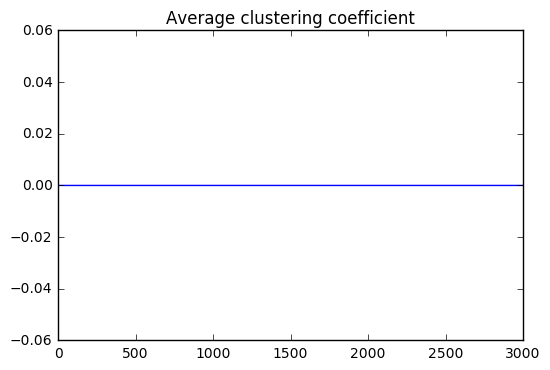

-----------k =  10  N_max =  3000 -----------------------------------------------------------------


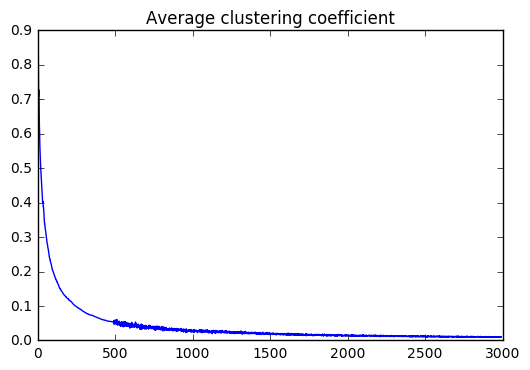

-----------k =  20  N_max =  3000 -----------------------------------------------------------------


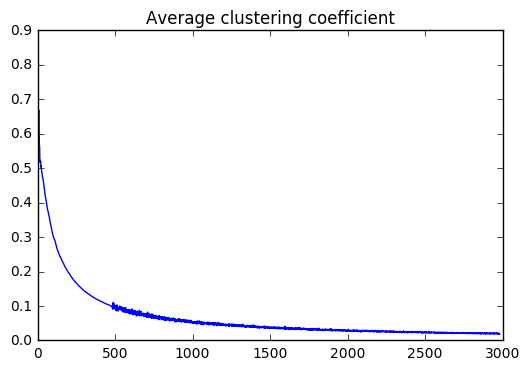

In [11]:
N = 3000
for k in (1,10,20):
    G = gen_start_graph(k)
    i = k        
    print '-----------k = ',k,' N_max = ',N,'-----------------------------------------------------------------'
    
    cl_coefs = [nx.average_clustering(G)]
    
    while i<N:
        G = growth_without_pa(G,k)
        i+=1
        if (i > 500):
            cl_coefs.append(nx.average_clustering(G,nodes = random.sample(range(0,i), i/10)))
        else:
            cl_coefs.append(nx.average_clustering(G))
    plt.plot(cl_coefs)
    plt.title('Average clustering coefficient')
    plt.show()

So, at each case we see that average clustering coefficient is decrease when $n \to +\infty$, where n is number of nodes. At first picture clustering coefficient is equal to zero, because all new nodes has degree 1. At other pictures we can explain this fact by this proof: At first moment we have something like regular graph with high clustering coefficient. At each moment we add new nodes and value of this coefficient is decrease, because we destroy structure of graph.
Now let's plot average path length for each case.

-----------k =  1  N_max =  3000 -----------------------------------------------------------------


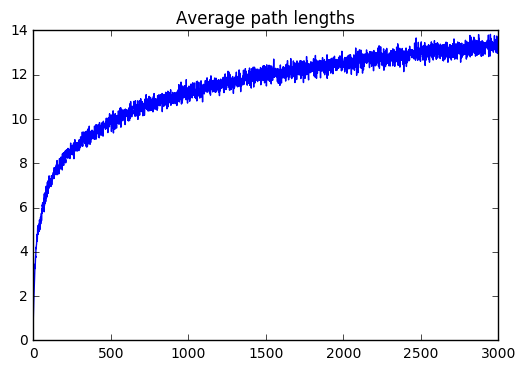

-----------k =  10  N_max =  3000 -----------------------------------------------------------------


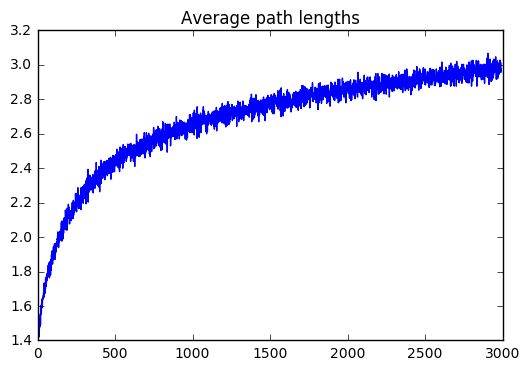

-----------k =  20  N_max =  3000 -----------------------------------------------------------------


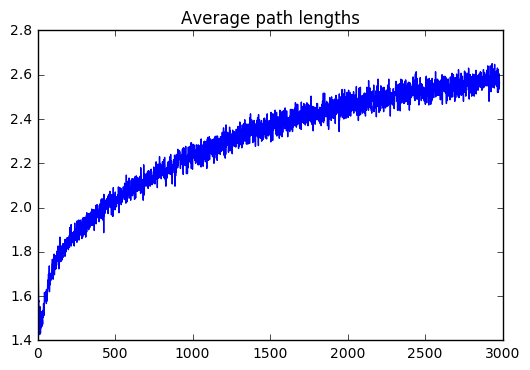

In [12]:
N = 3000
COUNT_EXPR = 300
for k in (1,10,20):
    G = gen_start_graph(k)
    G = growth_without_pa(G,k) # 1 growth to made our graph connect.
    i = k + 1        
    print '-----------k = ',k,' N_max = ',N,'-----------------------------------------------------------------'

    paths = [nx.average_shortest_path_length(G)]
    
    while i<N:
        G = growth_without_pa(G,k)
        i+=1
        all_nodes = nx.nodes(G)
        length = 0
        for j in range(0,COUNT_EXPR):
            n1 = all_nodes[np.random.randint(i)]
            n2 = all_nodes[np.random.randint(i)]
            while (n2==n1):
                n2 = all_nodes[np.random.randint(i)]
            length += len(nx.shortest_path(G,source=n1,target=n2))-1
        paths.append(length/float(COUNT_EXPR))
    
    plt.plot(paths)
    plt.title('Average path lengths')
    plt.show()

So, at each case we see that average path lengths is increase when $n \to +\infty$, where n is number of nodes. So, we can see that is growth something like $\log{n}$. It also confirms our theory.
Now let's plot how change average degree with age.

-----------k =  1  N_max =  3000 -----------------------------------------------------------------


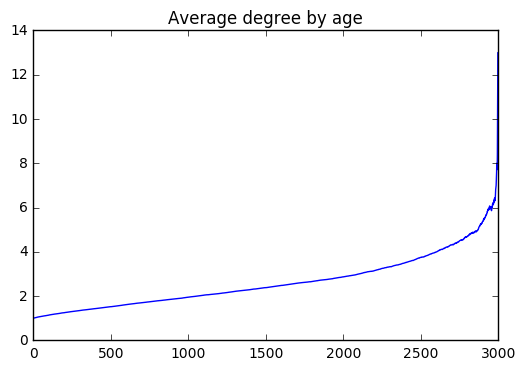

-----------k =  10  N_max =  3000 -----------------------------------------------------------------


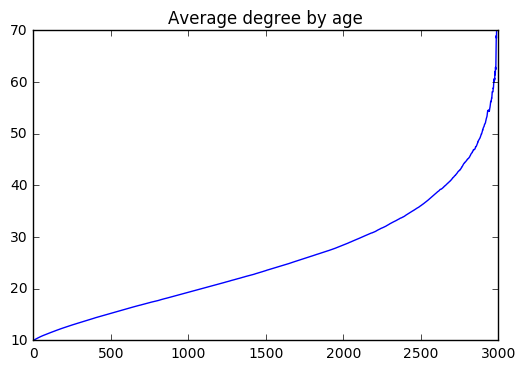

-----------k =  20  N_max =  3000 -----------------------------------------------------------------


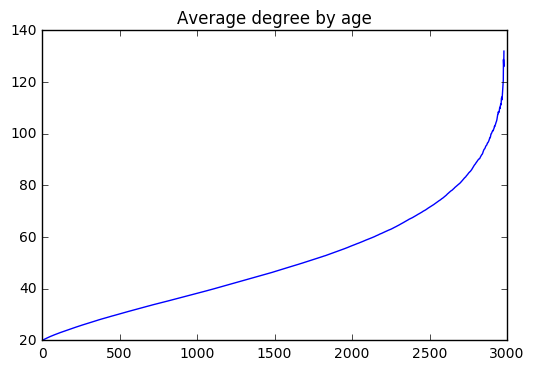

In [13]:
N = 3000
for k in (1,10,20):
    G = gen_start_graph(k)
    i = k        
    print '-----------k = ',k,' N_max = ',N,'-----------------------------------------------------------------'

    sums = np.zeros(N,dtype = float)
    counts = np.zeros(N,dtype = float)
    ages = [range(0,N)]
    
    oldest_ind = 0
    while i<N:
        G = growth_without_pa(G,k)
        i+=1
        degree = np.array(G.degree().values())
        ind = oldest_ind
        for j in range(k,i):
            counts[ind]+=1.0
            sums[ind] += float(degree[j])
            ind-=1
                
        oldest_ind +=1
        
    sums = sums[:oldest_ind]
    counts = counts[:oldest_ind]
    ages = range(0,oldest_ind)
    y = sums/counts
    
    plt.plot(ages,y)
    plt.title('Average degree by age')
    plt.show()

This figures confirms our theory. Average degree is increase with age. But we can see that this value increase not so fast. We can explain this fact with our lack of prefferential attachment.
<hr\>
Now let's implement Model B and do all exercises with this.

In [2]:
import random
def gen_empty_graph(n):
    G = nx.Graph()
    nodes = list(range(n))
    G.add_nodes_from(nodes)
    return G

def pa_without_growth(G): 
    N = nx.number_of_nodes(G)
    degree = np.array(G.degree().values())
    node_from = np.random.randint(N)
    neighbours = set(G.neighbors(node_from))
    all_nodes = set(G.nodes())
    ost = list(all_nodes - neighbours - set([node_from]))
    total = []
    for i in ost:
        for j in range(0,degree[i]+1):
            total.append(i)
    x = np.random.randint(len(total))        
    G.add_edge(node_from,total[x])
    return G
    
def pa_without_growth_iter(G,num_of_iter): 
    N = nx.number_of_nodes(G)
    degree = np.array(G.degree().values())
    for i in range(0,num_of_iter):
        node_from = np.random.randint(N)
        while (len(G.neighbors(node_from)) >= N - 1):
            node_from = np.random.randint(N)
        
        neighbours = set(G.neighbors(node_from))
        all_nodes = set(range(0,N))
        ost = list(all_nodes - neighbours - set([node_from]))
        total = []
        for i in ost:
            for j in range(0,degree[i]+1):
                total.append(i)
        x = np.random.randint(len(total))        
        G.add_edge(node_from,total[x])
        degree[node_from]+=1
        degree[total[x]]+=1
    return G
        

In all cases we will start with empty graph (2000 nodes)
In this case we also can modify 2 parameters( N - number of nodes, m - number of edges). So, we also assume that N is big (N > 1000). In this case let's change number of edges. Let's change m value and look on this cases: 
1. $ N = 1000, m = 4000,8000,16000 $
2. $ N = 2000, m = 8000,16000,32000 $

-----------m (Number_of_edges) =  2000 ;    N (Number of nodes) =  1000 -----------------------------------------------------------------
Max degree:  15


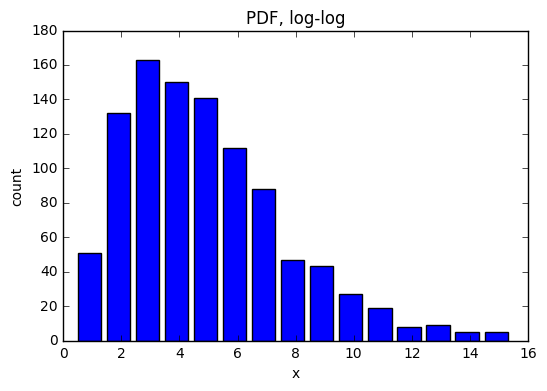

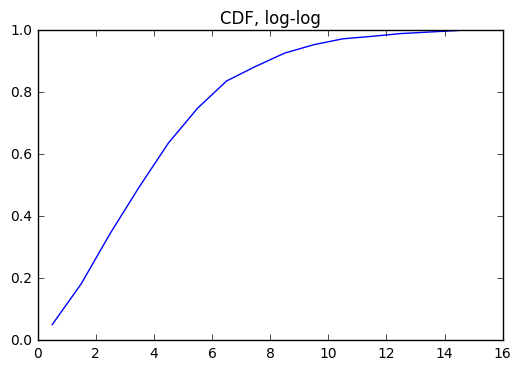

-----------m (Number_of_edges) =  4000 ;    N (Number of nodes) =  1000 -----------------------------------------------------------------
Max degree:  29


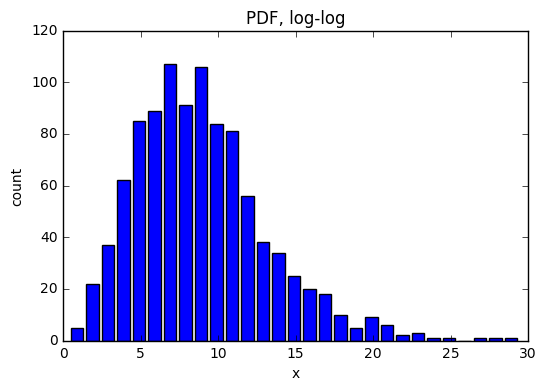

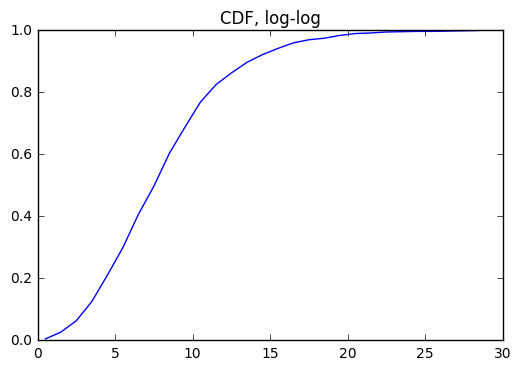

-----------m (Number_of_edges) =  8000 ;    N (Number of nodes) =  1000 -----------------------------------------------------------------
Max degree:  46


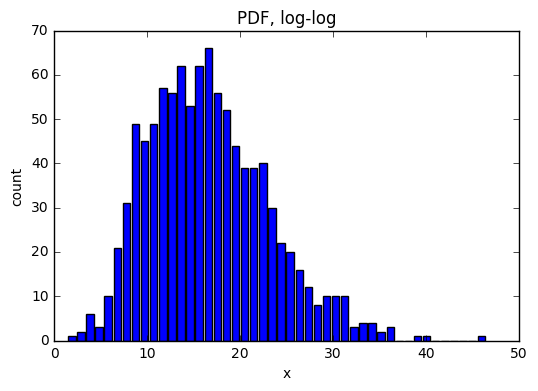

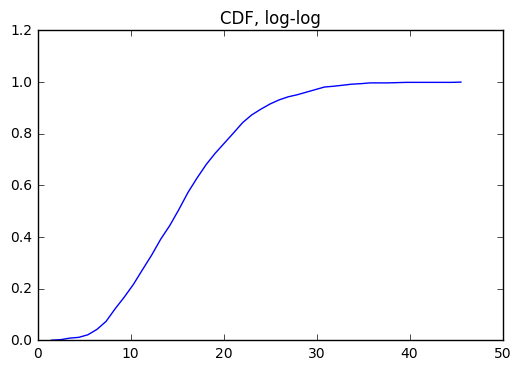

-----------m (Number_of_edges) =  4000 ;    N (Number of nodes) =  2000 -----------------------------------------------------------------
Max degree:  19


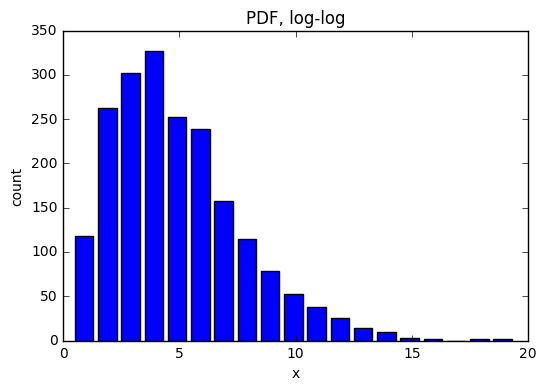

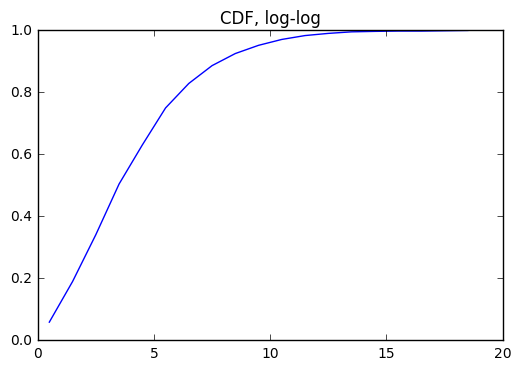

-----------m (Number_of_edges) =  8000 ;    N (Number of nodes) =  2000 -----------------------------------------------------------------
Max degree:  29


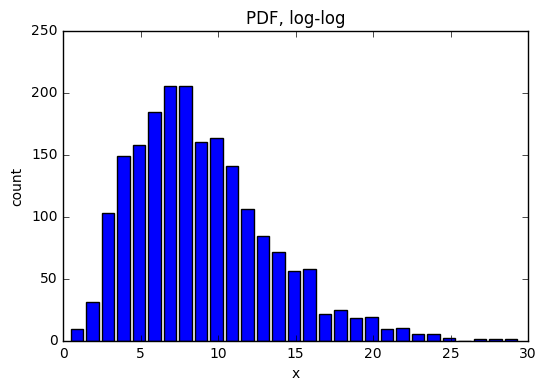

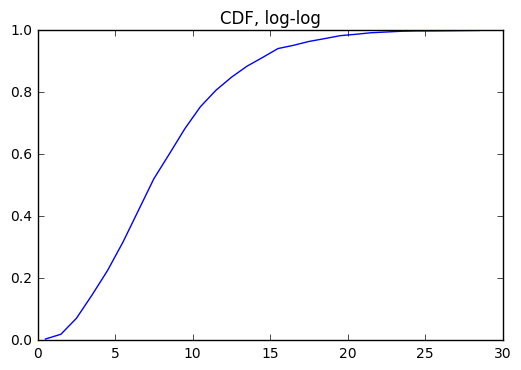

-----------m (Number_of_edges) =  16000 ;    N (Number of nodes) =  2000 -----------------------------------------------------------------
Max degree:  48


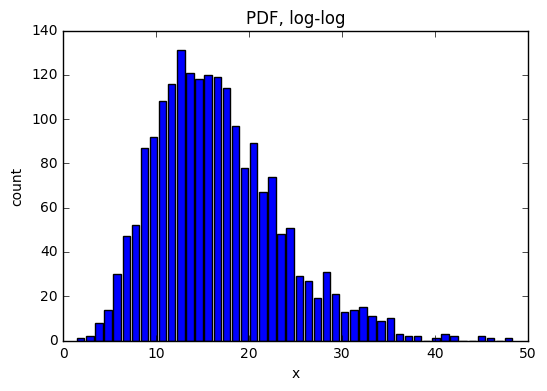

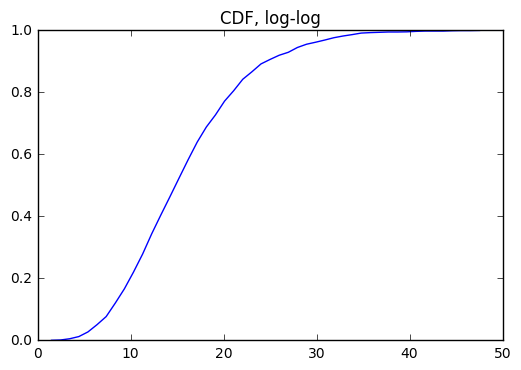

In [7]:
m = [0,2,4,8] # множители
for N in (1000,2000):
        G = gen_empty_graph(N)
        for j in range(1,4):
            G = pa_without_growth_iter(G,(m[j]-m[j-1])*N) # насколько вырасло число ребер
            print '-----------m (Number_of_edges) = ',m[j]*N,';    N (Number of nodes) = ',N,'-----------------------------------------------------------------'

            degrees = G.degree()
            degrees = np.array(degrees.values())
            print 'Max degree: ',np.max(degrees)
            yh, binEdges = np.histogram(degrees,bins = degrees.max())
            bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
            
                   

            plt.title('PDF, log-log')
            #plt.loglog(bincenters, yh, 'b.', lw=1,label = 'Data')
            #plt.loglog(xt, yt, 'r', label='Line')
            #plt.legend(loc='upper right', shadow=True)
            plt.bar(bincenters,yh)
            plt.ylabel('count')
            plt.xlabel('x')
            plt.show()


            Nodes_count = float(yh.sum())
            zh = np.zeros(len(yh),dtype = float)
            zh[0] = yh[0]/Nodes_count
            for i in range(1,len(yh)):
                zh[i] = zh[i-1]+yh[i]/Nodes_count
            plt.title('CDF, log-log')
            plt.plot(bincenters, list(zh))
            plt.show()

So, it looks like Gaussian ( may be Poisson) distribution and we absolutely sure that this distribution isn't power law. Let's calculate other statistics about this model. We will calculate all statistic with parameteres:
1. N = 1000, m = 10000.
2. N = 2000, m = 10000.

-----------m =  10000  N_max =  1000 -----------------------------------------------------------------


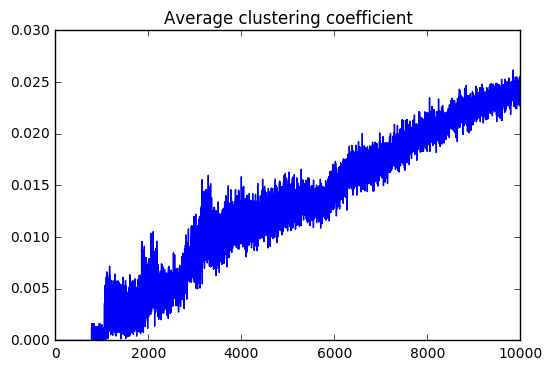

-----------m =  10000  N_max =  2000 -----------------------------------------------------------------


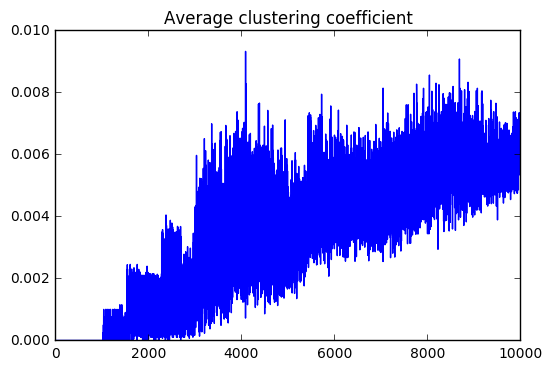

In [11]:
m = 10000
for N in (1000,2000):
    G = gen_empty_graph(N)
    i = 0 # number of nodes       
    print '-----------m = ',m,' N_max = ',N,'-----------------------------------------------------------------'
    
    cl_coefs = [nx.average_clustering(G)]
    
    while i<m:
        G = pa_without_growth(G)
        i+=1
        if (i > 500):
            cl_coefs.append(nx.average_clustering(G,nodes = random.sample(range(0,N), N/3)))
        else:
            cl_coefs.append(nx.average_clustering(G))
    plt.plot(cl_coefs)
    plt.title('Average clustering coefficient')
    plt.show()

So, at each case we see that average clustering coefficient is increase when m is increase, where m is number of edges. Let's explain obtained results. At each moment we add new edges and value of this coefficient is increase. 
Now let's plot average path length for each case.

-----------m =  10000  N_max =  1000 -----------------------------------------------------------------


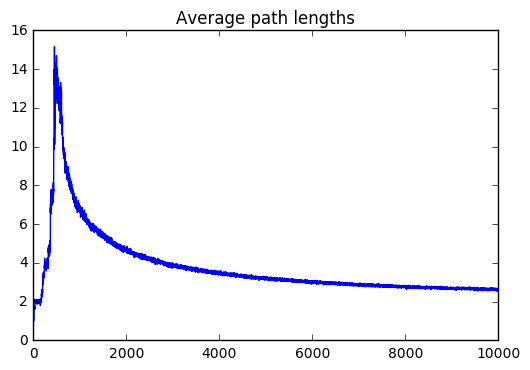

-----------m =  10000  N_max =  2000 -----------------------------------------------------------------


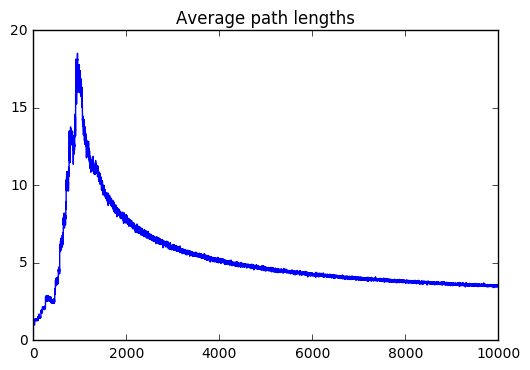

In [31]:
m = 10000
COUNT_EXPR = 300
for N in (1000,2000):
    G = gen_empty_graph(N)
    i = 0 # number of nodes       
    print '-----------m = ',m,' N_max = ',N,'-----------------------------------------------------------------'

    paths = [0]
    
    while i<m:
        G = pa_without_growth(G)
        i+=1
        all_nodes = sorted(nx.connected_components(G), key = len, reverse=True)[0] # we choose bigger connected component to calculate value
        length = 0
        if (len(all_nodes) > 2):
            for j in range(0,COUNT_EXPR):
                n1 = all_nodes[np.random.randint(len(all_nodes))]
                n2 = all_nodes[np.random.randint(len(all_nodes))]
                count_loop = 1
                while (n2==n1):
                    n2 = all_nodes[np.random.randint(len(all_nodes))]
                    count_loop+=1
                    if (count_loop > 15):
                        print "!"
                        break;
                
                
                length += len(nx.shortest_path(G,source=n1,target=n2))-1
            paths.append(length/float(COUNT_EXPR))
        else:
            paths.append(1)
    
    plt.plot(paths)
    plt.title('Average path lengths')
    plt.show()

In this case we can have not connected graph. Let's use max connected component in this case. So, at each case we see that average path lengths is increase when number of nodes isn't big. We think that happened because at start we have empty graph and our graph at each step will be have more and more edges and at early moment when two connected compnents are union average path lengths is increase. After some point our graph is connected and average path lengths is decrease.

We can't plot dependence value of degree from age, because all nodes have the same age and created in one moment. If we plot dependence value of degree from step (one step is one adding edge) then we didn't see anything new because in each step our average degree is growth to ${2} \over{N}$  , where N is number of nodes.

So, we can conclude that both models can't use to model real network . In both cases degree distribution isn't power law.

### <hr /> Task 2

Consider the following  "Vertex copying model" of growing network.

At every time step a random vertex from already existing vertices is selected and duplicated together with all edges, such that  every edge of the  vertex
* is copied with probability $q$
* is rewired to any other randomly selected vertex with probability $1-q$


Starting state is defined by some small number of randomly connected vertices.

The model can generate both directed and undirected networks.

1. Generate  graphs based on the model ($N > 1000$ nodes)
2. Compute CDF/PDF, describe the distribution and compute\describe its properties.
3. Illustate the following dependencies: 
    * average path length to the number of nodes
    * average clustering coefficient to the number of nodes
    * average node degee to the nodes "age"
    
Analyse results with respect to various parameter settings

<hr />
At first let's implement function that can generate our graph.

In [42]:
import random
def vertex_copy_growth(G,q): 
    N = nx.number_of_nodes(G)
    node_copy = np.random.randint(N)
    G.add_node(N)
    count = 0 # number of edges to other nodes
    for node in G.neighbors(node_copy):
        if np.random.random()<=q:
            G.add_edge(N,node)
        else:
            count+=1
    
    list_of_non_neighbours = list(set(range(0,N-1)) - set(G.neighbors(node_copy)))
    if (len(list_of_non_neighbours) < count):
        node_to = list_of_non_neighbours
    else:
        node_to = random.sample(list_of_non_neighbours, count)
    for node in node_to:
        G.add_edge(N,node)
    
    return G
    

Now let's compute cdf/pdf.

This is implementation of generation our graph. So, we have two variables to build graph (N - number of nodes, q - probability of change). Now we must analyse results with different values of q and N. We assume that N is big ( > 1000). Let's change q value and look what's happened if N growths on this cases: 
1. $ q = 0, N = 1000,3000 $
2. $ q = 0.3, N = 1000,3000 $
3. $ q = 0.6, N = 1000,3000 $
5. $ q = 1, N = 1000,3000 $

-----------  N (Number of nodes) =  1000  ;  q (parameter) =  0 -------------------------------------
Max degree:  317
NormaltestResult(statistic=0.69669265561790428, pvalue=0.70585437687858499)


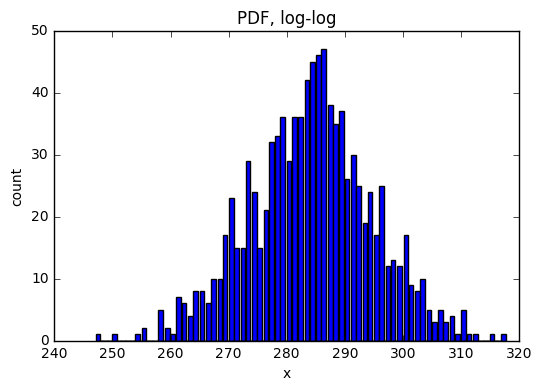

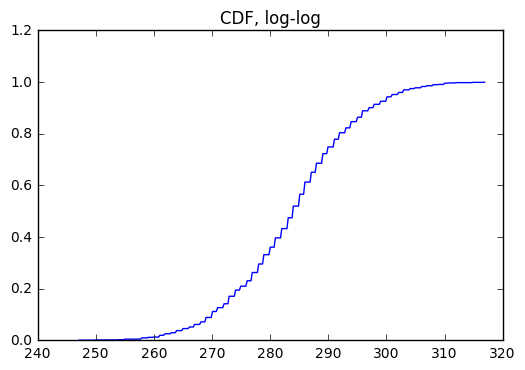

-----------  N (Number of nodes) =  3000  ;  q (parameter) =  0 -------------------------------------
Max degree:  911
NormaltestResult(statistic=0.19655758733256873, pvalue=0.90639617101379133)


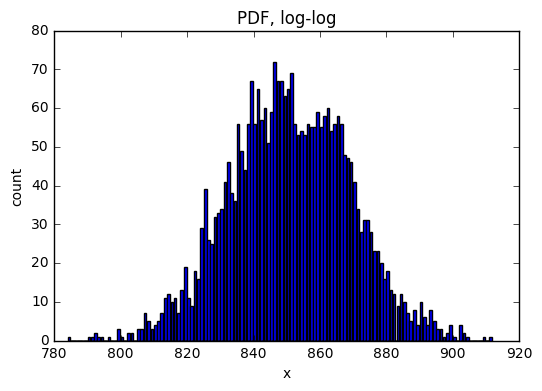

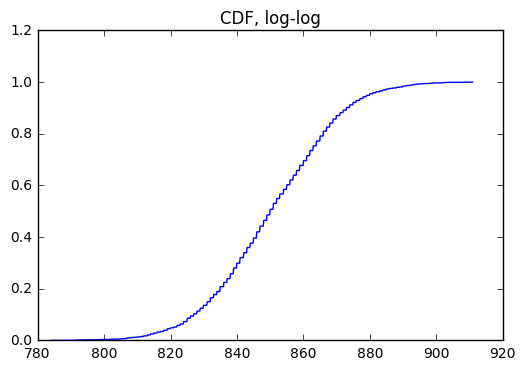

-----------  N (Number of nodes) =  1000  ;  q (parameter) =  0.3 -------------------------------------
Max degree:  460
NormaltestResult(statistic=1.7772202404405268, pvalue=0.41122691170872527)


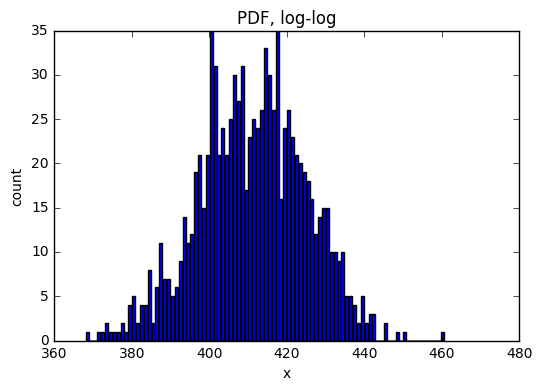

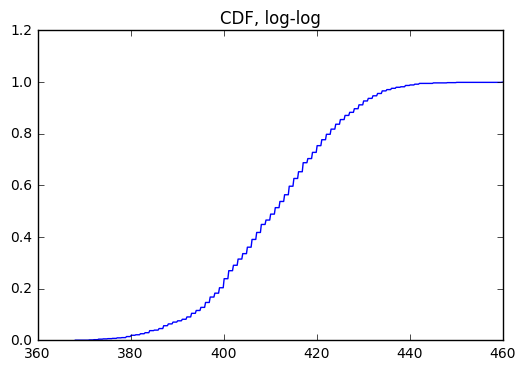

-----------  N (Number of nodes) =  3000  ;  q (parameter) =  0.3 -------------------------------------
Max degree:  1305
NormaltestResult(statistic=1.3376203198524437, pvalue=0.51231779152007273)


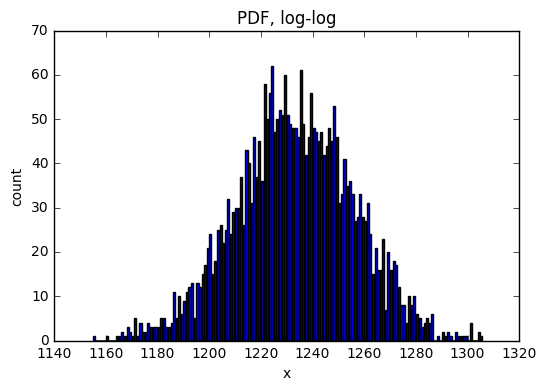

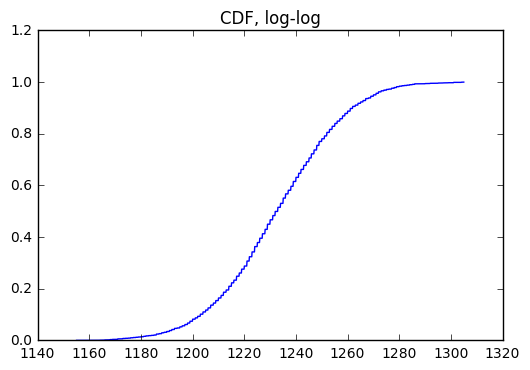

-----------  N (Number of nodes) =  1000  ;  q (parameter) =  0.6 -------------------------------------
Max degree:  574
NormaltestResult(statistic=0.055758920425434975, pvalue=0.97250558535274478)


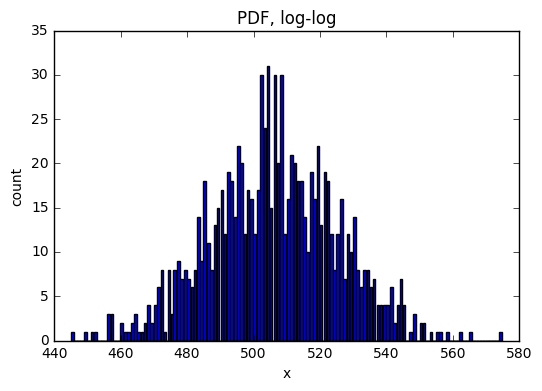

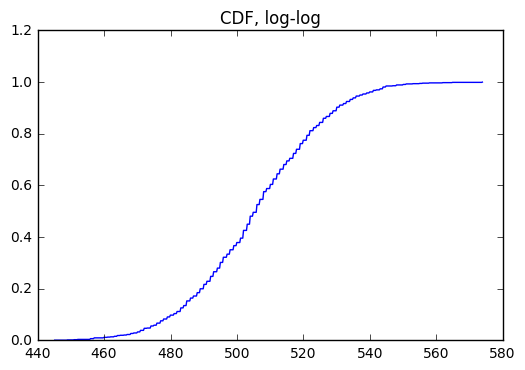

-----------  N (Number of nodes) =  3000  ;  q (parameter) =  0.6 -------------------------------------
Max degree:  1630
NormaltestResult(statistic=1.2557652595392681, pvalue=0.53372068974723419)


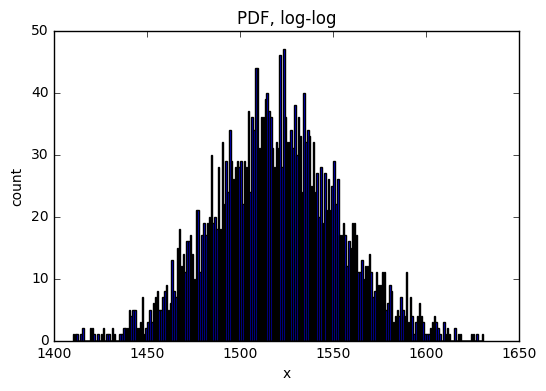

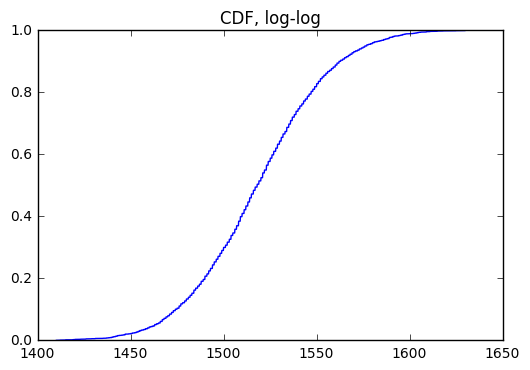

-----------  N (Number of nodes) =  1000  ;  q (parameter) =  0.95 -------------------------------------
Max degree:  831
NormaltestResult(statistic=1913.2492305881699, pvalue=0.0)


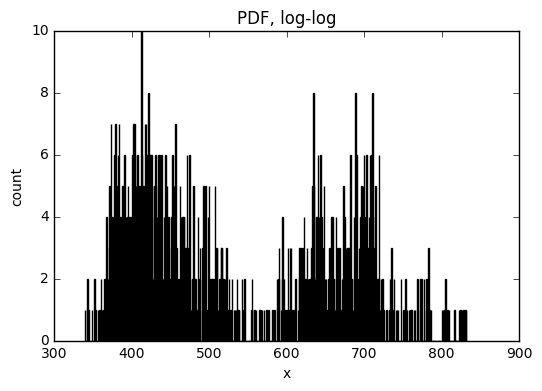

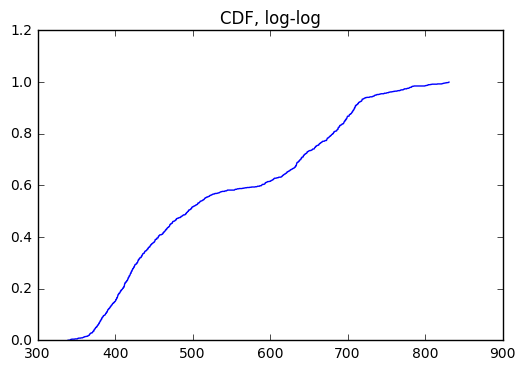

-----------  N (Number of nodes) =  3000  ;  q (parameter) =  0.95 -------------------------------------
Max degree:  2412
NormaltestResult(statistic=masked, pvalue=1.0)


/home/rustem/anaconda2/lib/python2.7/site-packages/scipy/stats/mstats_basic.py:2248: RuntimeWarning: divide by zero encountered in true_divide
  term2 = ma.power((1-2.0/A)/denom,1/3.0)


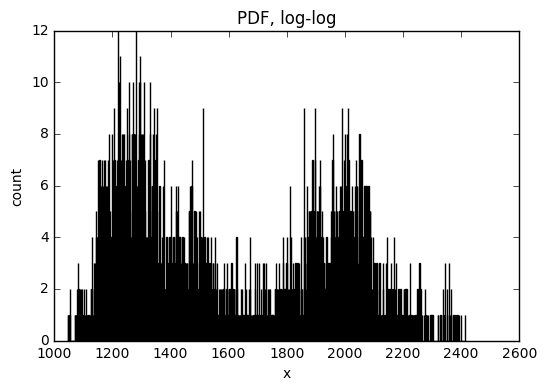

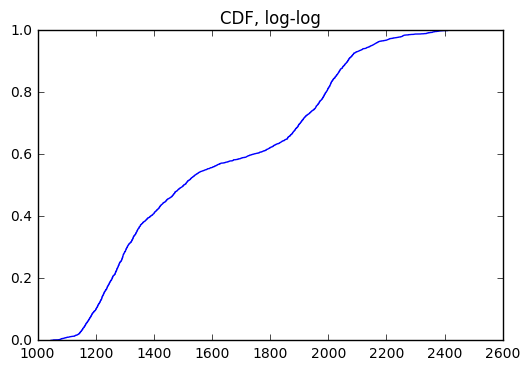

In [47]:
import scipy.stats.mstats as ms
start_number_of_nodes = 3
N = [1000,3000]
for q in (0,0.3,0.6,0.95):
    G = nx.complete_graph(start_number_of_nodes)
    for j in range(0,2):
        while (G.number_of_nodes() < N[j]):
            vertex_copy_growth(G,q)
        print '-----------  N (Number of nodes) = ',N[j],' ;  q (parameter) = ',q,'-------------------------------------'

        degrees = G.degree()
        degrees = np.array(degrees.values())
        print 'Max degree: ',np.max(degrees)
        yh, binEdges = np.histogram(degrees,bins = degrees.max())
        bincenters = 0.5*(binEdges[1:]+binEdges[:-1])

        print ms.normaltest(degrees)

        plt.title('PDF, log-log')
        #plt.loglog(bincenters, yh, 'b.', lw=1,label = 'Data')
        #plt.loglog(xt, yt, 'r', label='Line')
        #plt.legend(loc='upper right', shadow=True)
        plt.bar(bincenters,yh)
        plt.ylabel('count')
        plt.xlabel('x')
        plt.show()


        Nodes_count = float(yh.sum())
        zh = np.zeros(len(yh),dtype = float)
        zh[0] = yh[0]/Nodes_count
        for i in range(1,len(yh)):
            zh[i] = zh[i-1]+yh[i]/Nodes_count
        plt.title('CDF, log-log')
        plt.plot(bincenters, list(zh))
        plt.show()

So, in each case we found pdf and cdf and check hypothesis of normal distribution. Let's explain obtained results. If q value is small we can see that it looks like normal distribution and our test confirm it. If q-value is big it absolutely not normal distribution, but look something like two normal distribution together. Let's calculate other statistic in three cases:
1. q = 0.3
2. q = 0.6
3. q = 0.9

In each case we define max number of nodes to 1000

-----------q =  0.3  N_max =  1000 -----------------------------------------------------------------


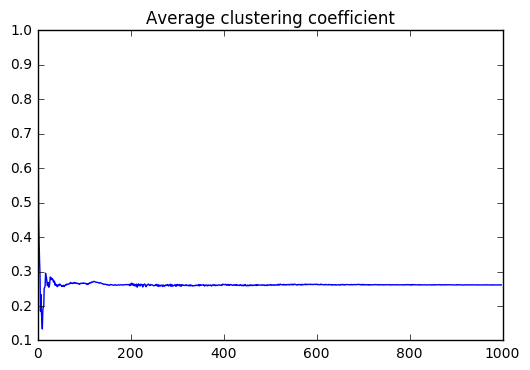

-----------q =  0.6  N_max =  1000 -----------------------------------------------------------------


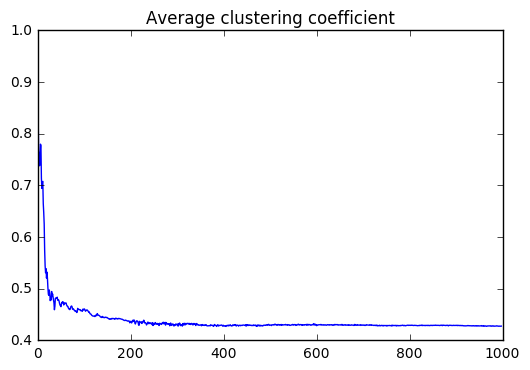

-----------q =  0.9  N_max =  1000 -----------------------------------------------------------------


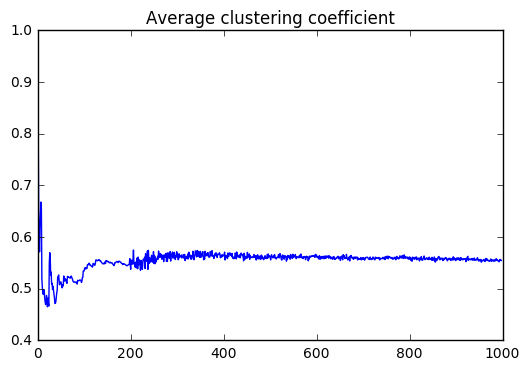

In [63]:
N = 1000
start_number_of_nodes = 3
for q in (0.3,0.6,0.9):
    G = nx.complete_graph(start_number_of_nodes)
    
    print '-----------q = ',q,' N_max = ',N,'-----------------------------------------------------------------'

    cl_coefs = [nx.average_clustering(G)]
    i = start_number_of_nodes
    while i<N:
        G = vertex_copy_growth(G,q) 
        i+=1
        if (i > 200):
            cl_coefs.append(nx.average_clustering(G,nodes = random.sample(range(0,i), i/10)))
        else:
            cl_coefs.append(nx.average_clustering(G))
    plt.plot(cl_coefs)
    plt.title('Average clustering coefficient')
    plt.show()

We can see that in each case our average clustering coefficient is big and not decrease from some value, when $N \to \infty$. If q is bigger we see decreasing more accurately. Let's try explain this result. We can assume that this situation happened, because our average degree is increase at each step.
Now let's plot average path length for each case.

----------- q =  0.3  N_max =  1000 -----------------------------------------------------------------


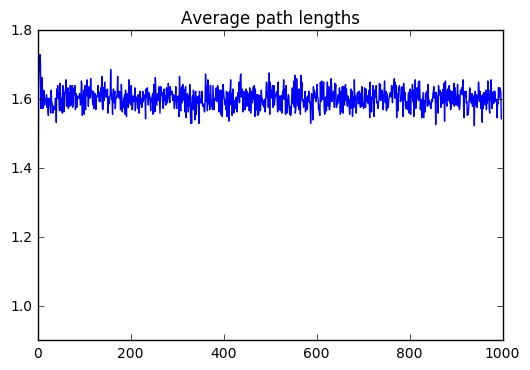

----------- q =  0.6  N_max =  1000 -----------------------------------------------------------------


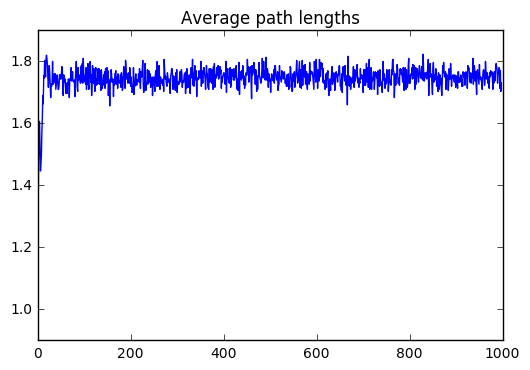

----------- q =  0.9  N_max =  1000 -----------------------------------------------------------------


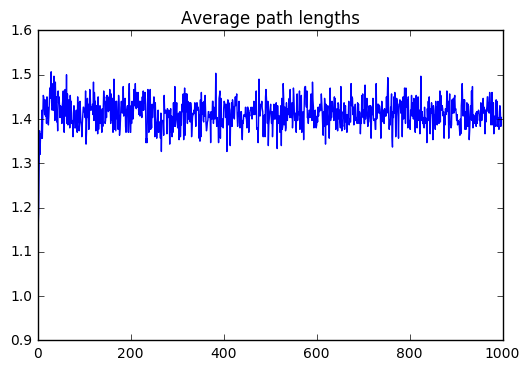

In [65]:
N = 1000
start_number_of_nodes = 3
for q in (0.3,0.6,0.9):
    G = nx.complete_graph(start_number_of_nodes)
    i = start_number_of_nodes       
    print '----------- q = ',q,' N_max = ',N,'-----------------------------------------------------------------'

    paths = [nx.average_shortest_path_length(G)]
    
    while i<N:
        G = vertex_copy_growth(G,q)
        i+=1
        all_nodes = nx.nodes(G)
        length = 0
        for j in range(0,COUNT_EXPR):
            n1 = all_nodes[np.random.randint(i)]
            n2 = all_nodes[np.random.randint(i)]
            while (n2==n1):
                n2 = all_nodes[np.random.randint(i)]
            length += len(nx.shortest_path(G,source=n1,target=n2))-1
        paths.append(length/float(COUNT_EXPR))
    
    plt.plot(paths)
    plt.title('Average path lengths')
    plt.show()

So, at each case we see that average path lengths isn't increase when $n \to +\infty$, where n is number of nodes and equal a constant (1.6).
Now let's plot how change average degree with age.

-----------q =  0.3  N_max =  1000 -----------------------------------------------------------------


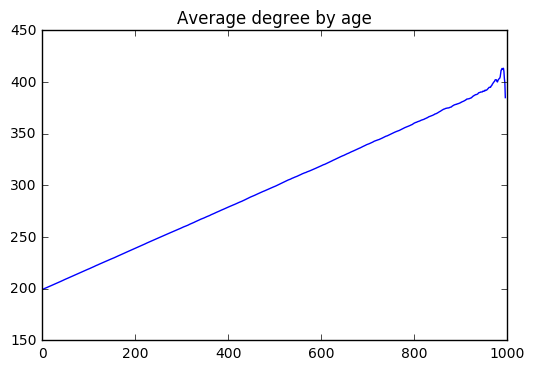

-----------q =  0.6  N_max =  1000 -----------------------------------------------------------------


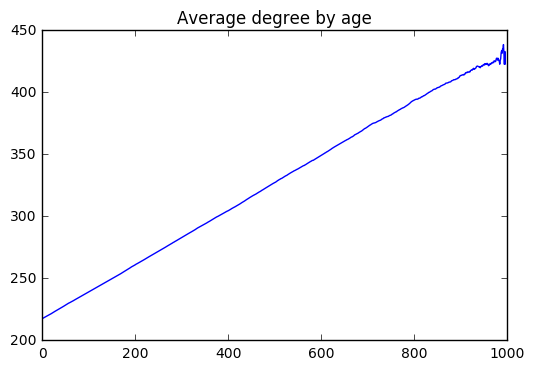

-----------q =  0.9  N_max =  1000 -----------------------------------------------------------------


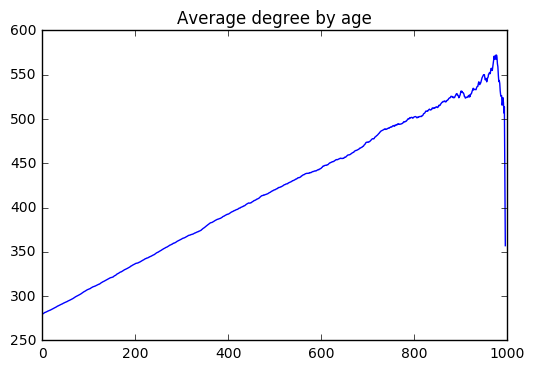

In [66]:
N = 1000
start_number_of_nodes = 3
for q in (0.3,0.6,0.9):
    G = nx.complete_graph(start_number_of_nodes)
    i = start_number_of_nodes        
    print '-----------q = ',q,' N_max = ',N,'-----------------------------------------------------------------'

    sums = np.zeros(N,dtype = float)
    counts = np.zeros(N,dtype = float)
    ages = [range(0,N)]
    
    oldest_ind = 0
    while i<N:
        G = vertex_copy_growth(G,q)
        i+=1
        degree = np.array(G.degree().values())
        ind = oldest_ind
        for j in range(start_number_of_nodes,i):
            counts[ind]+=1.0
            sums[ind] += float(degree[j])
            ind-=1
                
        oldest_ind +=1
        
    sums = sums[:oldest_ind]
    counts = counts[:oldest_ind]
    ages = range(0,oldest_ind)
    y = sums/counts
    
    plt.plot(ages,y)
    plt.title('Average degree by age')
    plt.show()

We can see that in each case average degree is increase, when $n \to \infty$. So, we can conclude that this model is different from other and in this model we have high clustering coefficient. It's important to model real networks.